In [1]:
from UTILS.tensor_ops import _2cpu2numpy
import torch,pickle
import numpy as np
from UTILS.tensor_ops import repeat_at
path = 'RECYCLE/3agent/sychronize_hashdict'

def get_arr(path):
    sychronize_FILE_hashdict = path # 'RECYCLE/sychronize_hashdict'
    sychronize_internal_hashdict = {}
    with open(sychronize_FILE_hashdict, 'rb') as f:
        sychronize_internal_hashdict = pickle.load(f)
    return sychronize_internal_hashdict

def get_act0_prob(path):
    data = get_arr(path)
    # data = sw.sychronize_internal_hashdict
    res = torch.stack([x['data'] for x in data['probs']])
    res = _2cpu2numpy(res)
    act0_prob = res[..., 0]
    act_other_prob = res[..., 1:].sum(-1)
    return act0_prob


def act0_prob_minus_mean(act0_prob):
    act0_prob_mean = act0_prob.mean(-1)
    act0_prob_bias = act0_prob - repeat_at(act0_prob_mean,-1,act0_prob.shape[1])
    return act0_prob_bias




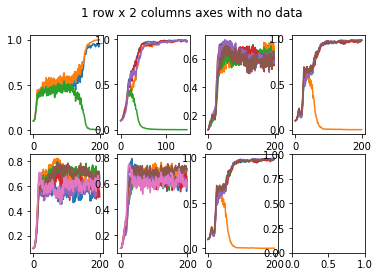

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
t_start = 0
t_end = 200
fig, axes = plt.subplots(2, 4)
axes = axes.flatten()
fig.suptitle('1 row x 2 columns axes with no data')
for i, exp in enumerate(["3agent","5agent","6agent","6agent-2","7agent","7agent-2","8agent"]):
    path = 'RECYCLE/%s/sychronize_hashdict'%exp
    act0_prob = get_act0_prob(path)
    for j in range(act0_prob.shape[1]):
        axes[i].plot(act0_prob[t_start:t_end,j])

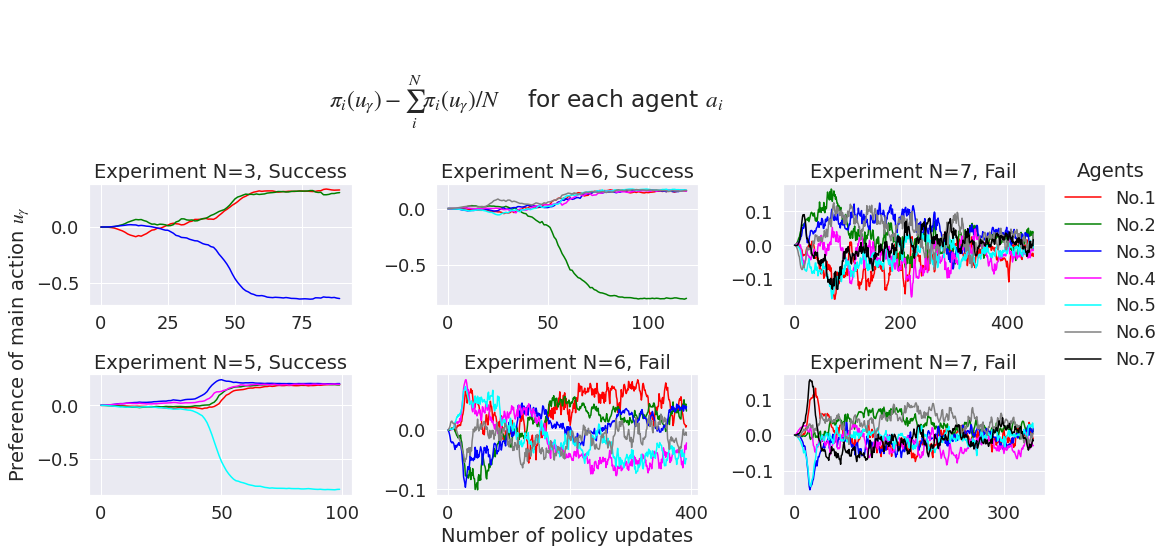

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
config = {
    "font.family":'serif',
    "font.size": 20,
    "mathtext.fontset":'stix',
    "font.serif": ['SimSun'],
}
rcParams.update(config)
sns.set_style('darkgrid')
sns.set_context('paper')

sns.set(font="Times New Roman", font_scale=1.62)
sns.set_palette("bright")
sns.color_palette("husl", 9)
t_start = 0
t_end = 2000
fig, axes = plt.subplots(2, 3, figsize=(15, 7))
axes = axes.flatten()
fig.suptitle(r'$   \pi_i(u_{\gamma})-\sum_{i}^{N} \pi_{i}\left(u_{\gamma}\right)/N$    for each agent $a_i$')
color = ['red','green','blue','magenta','cyan','Gray','black']
# for i, exp in enumerate(["3agent","6agent-2","7agent","5agent","6agent","7agent-2","INRECYCYLE"]):
for i, exp in enumerate([
            ("3agent-2",        "Experiment N=3, Success"     , 0 , 90 ),
            ("6agent-2",        "Experiment N=6, Success"     , 0 , 120 ),
            ("7agent",          "Experiment N=7, Fail"        , 0 , 2000 ),
            ("5agent-2",        "Experiment N=5, Success"     , 0 , 100 ),
            ("6agent",          "Experiment N=6, Fail"        , 0 , 2000 ),
            ("7agent-2",        "Experiment N=7, Fail"        , 0 , 2000 ),
]):
    # if exp == "INRECYCYLE":
    #     path = 'RECYCLE/sychronize_hashdict'
    #     exp = "??"
    # else:
    exp, title,t_start, t_end = exp
    path = 'RECYCLE/%s/sychronize_hashdict'%exp
    act0_prob = get_act0_prob(path)
    act0_prob = act0_prob_minus_mean(act0_prob)
    axes[i].set_title(title)
    if i==0: axes[i].set_ylabel("Preference of main action $u_{\gamma}$                                 ")
    if  i==4 : axes[i].set_xlabel("Number of policy updates")
    for j in range(act0_prob.shape[1]):
        axes[i].plot(act0_prob[t_start:t_end,j],color[j],label='No.%d'%(j+1))
fig.tight_layout()
legend_ = plt.legend(ncol=1, title="Agents", bbox_to_anchor=(1.25, 1.9), frameon=False, loc='center')
# plt.legend("lower center",
#     bbox_to_anchor=(.5, .97), ncol=7, title=None, frameon=False, handlelength=1.45, fontsize='small')

# plt.tight_layout(); 
changedNameOfImage = True
nameOfImage = "PersonalityDevelop"
assert changedNameOfImage
plt.savefig('./%s.pdf'%nameOfImage, bbox_inches='tight')
# import os
# os.system('cd C:/Users/fuqingxu/Nextcloud/research/paper03_phase2/DoR-LMAS/img && pdfcrop %s.pdf'%nameOfImage)

fig.show()


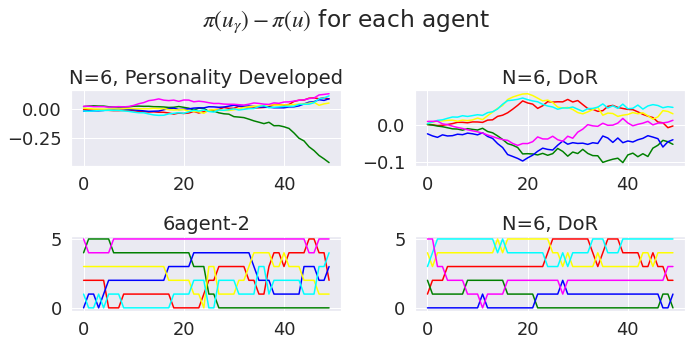

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
sns.set_context('paper')

sns.set(font="Times New Roman", font_scale=1.62)
sns.set_palette("bright")
sns.color_palette("husl", 9)
fig, axes = plt.subplots(2, 2, figsize=(10, 5))
axes = axes.flatten()
fig.suptitle('$\pi(u_{\gamma})-\pi(u)$ for each agent')
color = ['red','green','blue','yellow','cyan','magenta','black']

############## Part 1 #################
t_start = 10
t_end = 60
exp = "6agent-2"
exp_show_name = "N=6, Personality Developed"
if exp == "INRECYCYLE":
    path = 'RECYCLE/sychronize_hashdict'
    exp = "??"
else:
    path = 'RECYCLE/%s/sychronize_hashdict'%exp
act0_prob = get_act0_prob(path)
act0_prob = act0_prob_minus_mean(act0_prob)

argsort = np.argsort(act0_prob, -1)
ranking = np.argsort(argsort, -1)
axes[0].set_title(exp_show_name)
for j in range(act0_prob.shape[1]):
    axes[0].plot(act0_prob[t_start:t_end,j],color[j])

axes[2].set_title(exp)
    
for j in range(ranking.shape[1]):
    axes[2].plot(ranking[t_start:t_end,j],color[j])

############## Part 2 #################

exp = "6agent"
exp_show_name = "N=6, DoR"
if exp == "INRECYCYLE":
    path = 'RECYCLE/sychronize_hashdict'
    exp = "??"
else:
    path = 'RECYCLE/%s/sychronize_hashdict'%exp
act0_prob = get_act0_prob(path)
act0_prob = act0_prob_minus_mean(act0_prob)

argsort = np.argsort(act0_prob, -1)
ranking = np.argsort(argsort, -1)
axes[1].set_title(exp_show_name)
for j in range(act0_prob.shape[1]):
    axes[1].plot(act0_prob[t_start:t_end,j],color[j])
axes[3].set_title(exp_show_name)
for j in range(ranking.shape[1]):
    axes[3].plot(ranking[t_start:t_end,j],color[j])



plt.tight_layout(); 
fig.show()

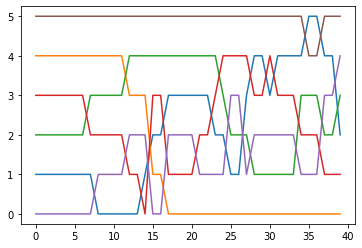

In [9]:
%matplotlib inline
'''
order plot
'''
p = act0_prob_bias[t_start:t_end]
argsort = np.argsort(p, -1)
pp = np.argsort(argsort, -1)
# index_arr = repeat_at(np.arange(7), 0, p.shape[0])


for i in range(pp.shape[1]):
    plt.plot(pp[:,i])

/tmp/ipykernel_3235068/3489523786.py:7: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax = Axes3D(fig)


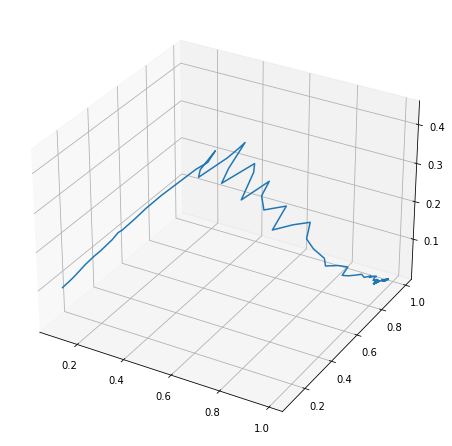

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig)
plt.plot(act0_prob[:,0],act0_prob[:,1],act0_prob[:,2])

In [8]:
%matplotlib inline

N = np.arange(100)
Y = (N+1)**(-1/N)
Y

/tmp/ipykernel_3462971/750888477.py:4: RuntimeWarning: divide by zero encountered in true_divide
  Y = (N+1)**(-1/N)


array([1.        , 0.5       , 0.57735027, 0.62996052, 0.6687403 ,
       0.69882712, 0.72302003, 0.74299714, 0.75983569, 0.77426368,
       0.78679344, 0.7977974 , 0.80755366, 0.81627464, 0.82412575,
       0.8312379 , 0.83771625, 0.84364637, 0.84909862, 0.8541315 ,
       0.85879407, 0.86312781, 0.86716807, 0.87094517, 0.87448527,
       0.8778111 , 0.88094247, 0.88389679, 0.88668937, 0.88933377,
       0.89184205, 0.89422493, 0.89649204, 0.89865201, 0.90071259,
       0.90268082, 0.90456304, 0.90636504, 0.90809206, 0.9097489 ,
       0.91133994, 0.9128692 , 0.91434037, 0.91575684, 0.91712174,
       0.91843796, 0.91970817, 0.92093485, 0.9221203 , 0.92326664,
       0.92437586, 0.92544982, 0.92649024, 0.92749873, 0.92847681,
       0.92942588, 0.93034728, 0.93124224, 0.93211193, 0.93295746,
       0.93377986, 0.9345801 , 0.93535911, 0.93611774, 0.93685683,
       0.93757715, 0.93827944, 0.93896439, 0.93963266, 0.94028487,
       0.94092163, 0.9415435 , 0.94215101, 0.94274467, 0.94332